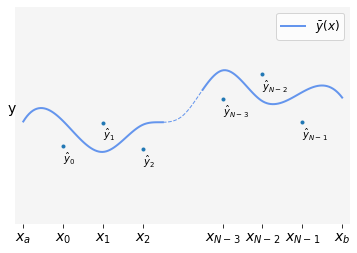

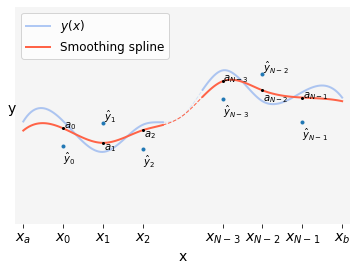

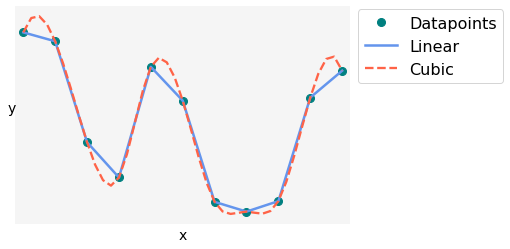

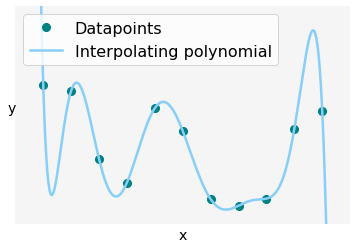

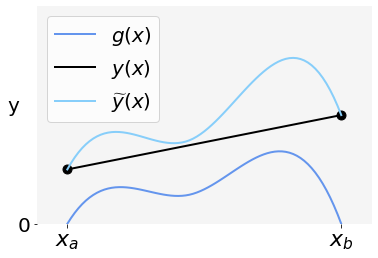

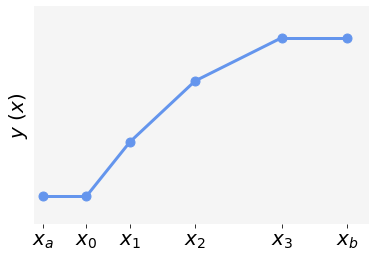

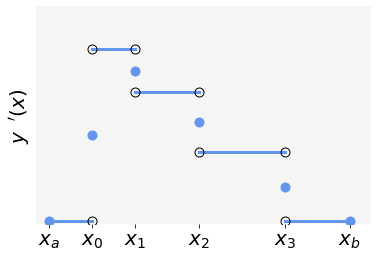

In [21]:
import numpy as np
import os
from numpy.linalg import solve
import matplotlib.pyplot as plt
from scipy.linalg import qr
from scipy import optimize
from scipy.special import erfinv
from scipy.interpolate import interp1d
from scipy import interpolate
from mpl_toolkits.axisartist.axislines import SubplotZero

def poly_interp(xi_multi,yi_multi):
    """
    General polynomial interpolation. 

    Compute the coefficients of the polynomial
    interpolating the points (xi[i],yi[i]) for i = 0,1,2,...,n-1
    where n = len(xi) = len(yi).

    Returns c, an array containing the coefficients of
      p(x) = c[0] + c[1]*x + c[2]*x**2 + ... + c[N-1]*x**(N-1).

    """
    # check inputs and print error message if not valid:
    error_message = "xi and yi should have type numpy.ndarray"
    assert (type(xi_multi) is np.ndarray) and (type(yi_multi) is np.ndarray), error_message

    error_message = "xi and yi should have the same length "
    assert len(xi_multi)==len(yi_multi), error_message

    # The linear system to interpolate through data points:
    # Uses a list comprehension
    
    n = len(xi_multi)
    A = np.vstack([xi_multi**j for j in range(n)]).T
    c = solve(A,yi_multi)

    return c

def plot_poly(xi_multi, yi_multi, c):
    """
    Plot the resulting function along with the data points.
    """
    x = np.linspace(xi_multi.min() - 1,  xi_multi.max() + 1, 1000)

    # Using Horner's rule for defining interpolating polynomial:
    n = len(xi_multi)
    y = c[n-1]
    for j in range(n-1, 0, -1):
        y = y*x + c[j-1]
        
    ## Plotting
    f = plt.figure()
    plt.clf()
    plt.plot(xi_multi,yi_multi,'.', color = 'teal',  markersize=16) 
    # plt.plot(22.5, 1.05, '.', color='darkslategray', markersize=16)
    plt.plot(x,y,'-', color = 'lightskyblue', linewidth = 2.5)
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', rotation = 0, fontsize = 14)
    plt.grid()
    plt.ylim(yi_multi.min()-1, yi_multi.max()+1)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.tick_params(left=False, bottom = False, right = False, top = False)
    plt.legend(['Datapoints', 'Interpolating polynomial'], loc='best', numpoints=1, prop={'size': 16})
    plt.xlim(-2, 22)
    plt.ylim(-1.3, 2.3)
    
    plt.show()
    my_path = os.getcwd()
    f.savefig(my_path + "/Plots/inter.pdf", bbox_inches='tight')

def plot_splines(x,y, datapoint):
    """
    Input: x and y values that the splines should interpolate. 
    Next datapoint that splines doesn't interpolate with.

    Returns: Plot of (x,y) values, linear and cubic splines interpolating these and an extra datapoint. 
    """
    f1 = interp1d(x, y)
    f2 = interp1d(x, y, kind='cubic')
    xnew = np.linspace(0, 20, num=41, endpoint=True)

    f = plt.figure()
    plt.plot(x, y, '.', color = 'teal', markersize=16)
    # plt.plot(datapoint[0], datapoint[1], '.', color = 'darkslategray', markersize=16)
    plt.plot(xnew, f1(xnew), '-',  linewidth = 2.5, color = 'cornflowerblue')
    plt.plot(xnew, f2(xnew), '--', linewidth = 2.3, color = 'tomato')
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', rotation = 0, fontsize = 14)
    
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.tick_params(left=False, bottom = False, right = False, top = False)
    plt.legend(['Datapoints', 'Linear', 'Cubic'], loc='lower left', numpoints=1, prop={'size': 16},bbox_to_anchor=(1, 0.61) )
    plt.xlim(-0.5, 20.5)
    plt.show()
    my_path = os.getcwd()
    f.savefig(my_path + "/Plots/splines.pdf", bbox_inches='tight')

def sum_of_functions(x,y, x1, y1, point1, point2):
    """
    Input: 
    (x,y) coordinates that the first polynomial should interpolate.
    (x,y) coordinates that the second polynomial should interpolate.
    Start and ending point for the two functions.
    
    Returns:
    Plot of the two functions from the start point to the end point, and the sum of the functions.
    """
    xticks = [ 3, 5, 8]
    xnew = np.linspace(1,10,75)
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    f2 = interp1d(x, y, kind = 'cubic')
    f3 = interp1d(x1, y1, kind = 'cubic')

    f = plt.figure()
    plt.plot(point1[0], point1[1], '.', color='black', markersize=18)
    plt.plot(point2[0], point2[1], '.',color = 'black', markersize=18)
    plt.plot(xnew, f2(xnew), '-', color='cornflowerblue', label = '$g(x)$', linewidth = 2)
    #plt.plot(xnew, f3(xnew), '-', color='black', label = '$y(x)$',linewidth = 2)
    plt.plot(x_values, y_values,'-', color='black', label = '$y(x)$',linewidth = 2)
    plt.plot(xnew, f3(xnew)+f2(xnew), '-', color='lightskyblue', label = '$\widetilde{y}(x)$', linewidth = 2)
    plt.xlim(0, 11)
    plt.ylim(0, 12)
    plt.ylabel('y', rotation = 0, fontsize = 20)
    plt.legend( loc='upper left', numpoints=1, prop={'size': 20} )
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.yticks([0], [0] ,fontsize = 20)
    plt.xticks([1,10], ['$x_a$','$x_b$'], fontsize=22)
    plt.tick_params(left=True, bottom = True, right = False, top = False)
    plt.show()
    my_path = os.getcwd()
    f.savefig(my_path + "/Plots/sumof.pdf", bbox_inches='tight')

def piecewise_derivative(allx, color):

    x = [0, 1]
    y = [0, 0]
    x1 = [1, 2]
    y1 = [2, 2]
    x2 = [2, 3.5]
    y2 = [1.5, 1.5]
    x3 = [3.5, 5.5]
    y3 = [0.8, 0.8]
    x4 = [5.5, 7]
    y4 = [0, 0]
    emptypointx = [1, 1, 2, 2, 3.5, 3.5, 5.5, 5.5]
    emptypointy = [0, 2, 2, 1.5, 1.5, 0.8, 0.8, 0]
    holepointx = [0,1, 2, 3.5, 5.5,7]
    holepointy = [0,1, 1.75, 1.15, 0.4,0]
    my_xticks = ['$x_a$', '$x_0$', '$x_1$','$x_2$', '$x_3$', '$x_b$']

    f = interp1d(x, y)
    f1 = interp1d(x1, y1)
    f2 = interp1d(x2, y2)
    f3 = interp1d(x3, y3)
    f4 = interp1d(x4, y4)
    f5 = plt.figure()
    xnew = np.linspace(0, 1, 20)
    xnew1 = np.linspace(1, 2, 20)
    xnew2 = np.linspace(2, 3.5, 20)
    xnew3 = np.linspace(3.5, 5.5, 20)
    xnew4 = np.linspace(5.5, 7, 20)
    plt.plot(xnew, f(xnew), '-', color = color, linewidth=3)
    plt.plot(xnew1, f1(xnew1), '-', color = color, linewidth=3)
    plt.plot(xnew2, f2(xnew2), '-', color = color, linewidth=3)
    plt.plot(xnew3, f3(xnew3), '-', color = color, linewidth=3)
    plt.plot(xnew4, f4(xnew4), '-', color = color, linewidth=3)
    plt.plot(emptypointx, emptypointy, 'o', color='black', fillstyle= 'none', markersize=9)
    plt.plot(holepointx, holepointy, 'o', color=color, markersize=9)
    plt.xticks(allx, my_xticks, fontsize=20)
    plt.yticks([])
    plt.ylabel('$y\ ^{\ \prime} (x)$', fontsize=20)
    plt.plot()
    plt.xlim(-0.3,7.5)
    plt.ylim(-0.03,2.5)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.show()
    my_path = os.getcwd()
    f5.savefig(my_path + "/Plots/ym.pdf", bbox_inches='tight')

def piecewise_function(allx, color):

    x = [0, 1]
    y = [1, 1]
    x1 = [1, 2]
    y1 = [1, 3]
    x2 = [2, 3.5]
    y2 = [3, 5.25]
    x3 = [3.5, 5.5]
    y3 = [5.25, 6.85]
    x4 = [5.5, 7]
    y4 = [6.85, 6.85]
    holepointx = [0,1, 2, 3.5, 5.5,7]
    holepointy = [1,1, 3, 5.25, 6.85, 6.85]
    my_xticks = ['$x_a$', '$x_0$', '$x_1$','$x_2$', '$x_3$', '$x_b$']

    f = interp1d(x, y)
    f1 = interp1d(x1, y1)
    f2 = interp1d(x2, y2)
    f3 = interp1d(x3, y3)
    f4 = interp1d(x4, y4)
    f5 = plt.figure()
    xnew = np.linspace(0, 1, 20)
    xnew1 = np.linspace(1, 2, 20)
    xnew2 = np.linspace(2, 3.5, 20)
    xnew3 = np.linspace(3.5, 5.5, 20)
    xnew4 = np.linspace(5.5, 7, 20)
    plt.plot(xnew, f(xnew), '-', color = color, linewidth=3)
    plt.plot(xnew1, f1(xnew1), '-', color = color, linewidth=3)
    plt.plot(xnew2, f2(xnew2), '-', color = color, linewidth=3)
    plt.plot(xnew3, f3(xnew3), '-', color = color, linewidth=3)
    plt.plot(xnew4, f4(xnew4), '-', color = color, linewidth=3)
    plt.plot(holepointx, holepointy, 'o', color=color, markersize=9)
    plt.xticks(allx, my_xticks, fontsize=20)
    plt.yticks([])
    plt.ylabel('$y\ (x)$', fontsize=20)
    plt.plot()
    plt.xlim(-0.2,7.5)
    plt.ylim(-0.015,8)
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.show()
    my_path = os.getcwd()
    f5.savefig(my_path + "/Plots/y.pdf", bbox_inches='tight')

def yhatskitse(x,y):
    x1 = np.linspace(1,4.5,75)
    x2 = np.linspace(5.5,9,75)
    x3 = np.linspace(4.5,5.5,75)
    f2 = interp1d(x, y, kind = 'cubic')

    f7 = plt.figure()
    plt.plot(x1, f2(x1), '-', color='cornflowerblue', linewidth = 2)
    plt.plot(x2, f2(x2), '-', color='cornflowerblue', linewidth = 2)
    plt.plot(x3, f2(x3), '--', color='cornflowerblue', linewidth = 1)
    plt.xlim(0.8, 9.2)
    plt.ylim(2, 3.2)
    plt.ylabel('y', rotation = 0, fontsize = 14)
    plt.yticks([])
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    xtick = [1,2,3,4,6,7,8,9]
    yhat = [2.57 - 0.14, 2.4+0.16, 2.55-0.135, 2.85-0.16, 2.68+0.15, 2.73-0.165]
    plt.xticks(xtick, ['$x_a$' ,'$x_0$','$x_1$','$x_2$','$x_{N-3}$','$x_{N-2}$' ,'$x_{N-1}$','$x_b$'], fontsize=14)
    plt.plot([2,3,4,6,7,8],yhat,'.', markersize = 6)
    fonts = 10
    plt.text(2, 2.57 - 0.14 -0.09,  '$\hat{y}_{0}$', fontsize=fonts)
    plt.text(3, 2.4+0.16 -0.09,  '$\hat{y}_{1}$', fontsize=fonts)
    plt.text(4,  2.55-0.135-0.09,  '$\hat{y}_{2}$', fontsize=fonts)
    plt.text(6, 2.85-0.16-0.09,  '$\hat{y}_{N-3}$', fontsize=fonts)
    plt.text(7, 2.68+0.15-0.09,  '$\hat{y}_{N-2}$', fontsize=fonts)
    plt.text(8, 2.73-0.165-0.09,  '$\hat{y}_{N-1}$', fontsize=fonts)
    plt.legend(['$\\bar{y}(x)$'], loc='best', numpoints=1, prop={'size': 12} )
    plt.tick_params(left=False, bottom = True, right = False, top = False)
    plt.show()
    my_path = os.getcwd()
    f7.savefig(my_path + "/Plots/yhatskitse.pdf", bbox_inches='tight')

def yhatskitsewpred(x,y):
    x1 = np.linspace(1,4.5,75)
    x2 = np.linspace(5.5,9,75)
    x3 = np.linspace(4.5,5.5,75)
    f2 = interp1d(x, y, kind = 'cubic')

    f8 = plt.figure()
    plt.plot(x1, f2(x1), '-', color='cornflowerblue', linewidth = 2, alpha = 0.5, label = '$y(x)$')
    plt.plot(x2, f2(x2), '-', color='cornflowerblue', linewidth = 2, alpha = 0.5)
    plt.plot(x3, f2(x3), '--', color='cornflowerblue', linewidth = 1, alpha = 0.2)
    plt.xlim(0.8, 9.2)
    plt.ylim(2, 3.2)
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', rotation = 0, fontsize = 14)
    plt.yticks([])
    ax = plt.gca()
    ax.set_facecolor('whitesmoke')
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    xtick = [1,2,3,4,6,7,8,9]
    yhat = [2.57 - 0.14, 2.4+0.16, 2.55-0.135, 2.85-0.16, 2.68+0.15, 2.73-0.165]
    a = [2.568-0.05,2.57 - 0.04, 2.4+0.05, 2.55-0.03, 2.6,2.85-0.06, 2.68+0.06, 2.73-0.03, 2.7-0.02]
    
    f3 = interp1d(x, a, kind = 'cubic')
    plt.plot(x1, f3(x1), '-', color='tomato', linewidth = 2, label = 'Smoothing spline')
    plt.plot(x2, f3(x2), '-', color='tomato', linewidth = 2)
    plt.plot(x3, f3(x3), '--', color='tomato', linewidth = 1)
    
    plt.xticks(xtick, ['$x_a$' ,'$x_0$','$x_1$','$x_2$','$x_{N-3}$','$x_{N-2}$' ,'$x_{N-1}$','$x_b$'], fontsize=14)
    plt.plot([2,3,4,6,7,8],yhat,'.', markersize = 6)
    plt.plot([2,3,4,6,7,8],[2.57 - 0.04, 2.4+0.05, 2.55-0.03,2.85-0.06, 2.68+0.06, 2.73-0.03],'.', markersize = 4, color = 'black')
    fonts = 10
    plt.text(2, 2.57 - 0.14 -0.09,  '$\hat{y}_{0}$', fontsize=fonts)
    plt.text(3.02, 2.4+0.16 +0.01,  '$\hat{y}_{1}$', fontsize=fonts)
    plt.text(4,  2.55-0.135-0.09,  '$\hat{y}_{2}$', fontsize=fonts)
    plt.text(6, 2.85-0.16-0.09,  '$\hat{y}_{N-3}$', fontsize=fonts)
    plt.text(7.02, 2.68+0.15+0.01,  '$\hat{y}_{N-2}$', fontsize=fonts)
    plt.text(8, 2.73-0.165-0.09,  '$\hat{y}_{N-1}$', fontsize=fonts)
    plt.tick_params(left=False, bottom = True, right = False, top = False)
    plt.text(2.02, 2.57 - 0.04,  '$a_{0}$', fontsize=fonts)
    plt.text(3.02, 2.4+0.05-0.04,  '$a_{1}$', fontsize=fonts)
    plt.text(4.02,  2.55-0.07,  '$a_{2}$', fontsize=fonts)
    plt.text(6.02, 2.85-0.06,  '$a_{N-3}$', fontsize=fonts)
    plt.text(7.02, 2.68,  '$a_{N-2}$', fontsize=fonts)
    plt.text(8.02, 2.73-0.03,  '$a_{N-1}$', fontsize=fonts)
    plt.legend(loc='upper left', numpoints=1, prop={'size': 12} )
    plt.show()
    my_path = os.getcwd()
    f8.savefig(my_path + "/Plots/yhatskitsewpred.pdf", bbox_inches='tight')


#plot of yhat skitse
x = [1,2,3,4,5,6,7,8,9]
y = [2.568, 2.57, 2.4, 2.55, 2.6, 2.85, 2.68, 2.73,2.7]
yhatskitse(x,y)

yhatskitsewpred(x,y)


# Plot of linear and cubic splines interpolating x and y coordinates and an extra datapoint
x = np.linspace(0, 20, num=11, endpoint=True)
y = np.cos(-x**2/8.9)
datapoint = [22.5, 1.05]
plot_splines(x,y, datapoint)

# Interpolating polynomial through x and y coordinates
c = poly_interp(x, y)
plot_poly(x, y, c)

# Plot of two functions and the sum of them going from start to end point
x = [1, 3, 5, 8, 10]
y = [0, 2, 1.6, 4, 0]
x1 = [1, 3, 5, 8, 10]
y1 = [3, 3, 3, 5, 6]
point1 = [1, 3]
point2 = [10, 6]
sum_of_functions(x,y, x1, y1, point1, point2)


# Plot of piecewise function and the derivative
allx = [0, 1, 2, 3.5, 5.5, 7]
piecewise_function(allx, 'cornflowerblue')
piecewise_derivative(allx, 'cornflowerblue')

